In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
master_df = pd.read_csv("startup_ecosystem_funds.csv")

In [3]:
master_df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
master_df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


# Feature Exploration

In [6]:
#descarding column (SNo, Remark) for now as they may not add any value to model
fund_df = pd.DataFrame()
fund_df = master_df.drop(['SNo','Remarks'],axis=1)

In [7]:
fund_df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


#### Feature : StartupName

In [8]:
fund_df.StartupName.isnull().sum()

0

In [9]:
fund_count  = fund_df.groupby('StartupName').size()

In [10]:
fund_count.head()

StartupName
#Fame                   1
121Policy               1
1Crowd                  1
1mg                     3
1mg (Healthkartplus)    1
dtype: int64

In [11]:
sort_count = fund_count.sort_values(ascending=False)

In [12]:
sort_count.head()

StartupName
Swiggy       7
UrbanClap    6
Paytm        5
NoBroker     5
Medinfi      5
dtype: int64

In [13]:
sort_df = sort_count.to_frame(name='count')

In [14]:
sort_df.head()

,count
StartupName,
Swiggy,7
UrbanClap,6
Paytm,5
NoBroker,5
Medinfi,5


In [15]:
sort_df['StartUpName'] = sort_df.index

In [16]:
sort_df.head()

,count,StartUpName
StartupName,,
Swiggy,7,Swiggy
UrbanClap,6,UrbanClap
Paytm,5,Paytm
NoBroker,5,NoBroker
Medinfi,5,Medinfi


In [17]:
top_20 = sort_df.head(20)

In [18]:
top_20

,count,StartUpName
StartupName,,
Swiggy,7,Swiggy
UrbanClap,6,UrbanClap
Paytm,5,Paytm
NoBroker,5,NoBroker
Medinfi,5,Medinfi
Jugnoo,5,Jugnoo
Tracxn,4,Tracxn
Capital Float,4,Capital Float
Ola,4,Ola


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

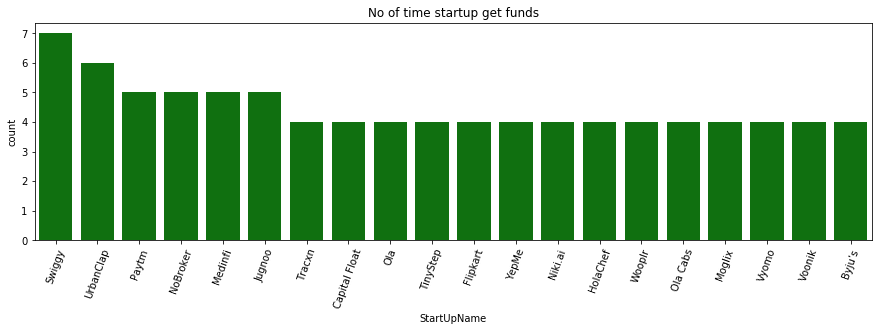

In [19]:
plt.figure(figsize=(15,4))
sns.barplot(data=top_20,x='StartUpName', y='count',color='green')
plt.title('No of time startup get funds')
plt.xticks(rotation=70)

In [20]:
#creating sub df 
df_conti = pd.DataFrame()

### Feature : Date

In [21]:
fund_df.Date.isnull().sum()

0

In [22]:
fund_df['Date'] = fund_df.Date.str.replace('.',"/")
fund_df['Date'] = fund_df.Date.str.replace('//',"/")

In [23]:
#Lets take out year from date column to see which year has hightest amount has funded
fund_df['Date'] = pd.to_datetime(fund_df.Date)

In [24]:
fund_df['Year'] = fund_df['Date'].dt.year

In [25]:
fund_df['Year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Year, dtype: int64

Text(0.5, 1.0, 'Most number of funds allocated by year')

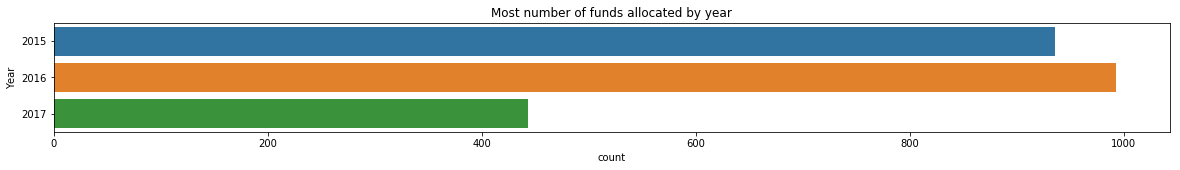

In [26]:
plt.figure(figsize=(20,2))
sns.countplot(data=fund_df, y=fund_df.Year)
plt.title('Most number of funds allocated by year')

In [27]:
df_conti['Year'] = fund_df['Year']

### Feature : IndustryVertical

In [28]:
fund_df.IndustryVertical.isnull().sum()

171

In [29]:
#we need to take care about missing values
fund_df.IndustryVertical.value_counts().head()

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Name: IndustryVertical, dtype: int64

In [30]:
fund_df.IndustryVertical = fund_df.IndustryVertical.str.replace('eCommerce','ECommerce')

In [31]:
fund_df['IndustryVertical'] = fund_df['IndustryVertical'].fillna(method='ffill')

In [32]:
fund_df.IndustryVertical.value_counts().head()

Consumer Internet            772
Technology                   313
ECommerce                    224
Online Travel Marketplace    172
Healthcare                    30
Name: IndustryVertical, dtype: int64

###### To find out top 20 verticals we need to deal first with AmountInUSD columns missing values

In [33]:
fund_df.AmountInUSD.isnull().sum()

847

Missing values are quite high

In [34]:
fund_df.AmountInUSD = fund_df.AmountInUSD.str.replace(',','')

In [35]:
fund_df.AmountInUSD = pd.to_numeric(fund_df.AmountInUSD)

In [36]:
fund_df.AmountInUSD = fund_df.AmountInUSD.fillna(fund_df.AmountInUSD.mean())

In [37]:
fund_df.AmountInUSD = pd.to_numeric(fund_df.AmountInUSD)

###### We have used mean to filling null values. There could be other better way to fill these value but for now we will work with mean. Now lets find out top 20 vertical who got most funds

In [38]:
vertical_sort = fund_df.sort_values(['AmountInUSD'])
vertical_group = vertical_sort.groupby('IndustryVertical').sum()
vertical_group.sort_values(by='AmountInUSD',ascending=False,inplace=True)

In [39]:
top_20 = vertical_group.head(20)
top_20

,AmountInUSD,Year
IndustryVertical,,
Consumer Internet,7.538753e+09,1556585
ECommerce,5.227564e+09,451643
Technology,2.595447e+09,631131
Online Travel Marketplace,1.721054e+09,346580
Online Marketplace,7.000000e+08,2015
E-Commerce & M-Commerce platform,6.800000e+08,2015
Car Aggregator & Retail Mobile App,5.000000e+08,2015
Ecommerce Marketplace,5.000000e+08,2015
Cab Aggregator,4.000000e+08,2015


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

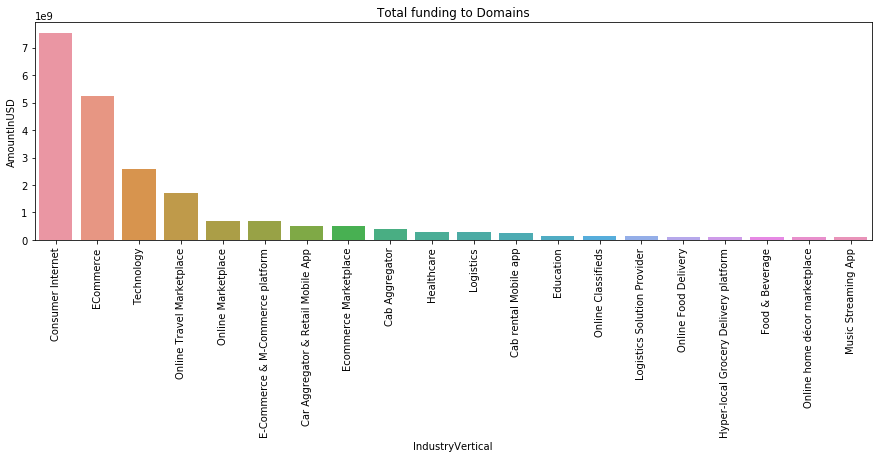

In [40]:
plt.figure(figsize=(15,4))
sns.barplot(data=top_20,x=top_20.index, y='AmountInUSD')
plt.title('Total funding to Domains')
plt.xticks(rotation=90)

In [41]:
df_conti['IndustryVertical'] = fund_df['IndustryVertical']

In [42]:
df_conti.head()  #Sub dataframe for modeling 

,Year,IndustryVertical
0,2017,Technology
1,2017,Technology
2,2017,Consumer Internet
3,2017,Consumer Internet
4,2017,Consumer Internet


### Feature : SubVertical

In [43]:
fund_df.SubVertical.isnull().sum()

936

In [44]:
fund_df.SubVertical.value_counts().head(10)

Online Pharmacy             9
Food Delivery Platform      8
Online lending platform     5
Online Learning Platform    4
ECommerce Marketplace       3
Fitness Mobile App          3
Data Analytics platform     3
Online Payment Gateway      3
Real Estate Portal          2
Medical Supplies eTailer    2
Name: SubVertical, dtype: int64

In [45]:
fund_df['SubVertical'] = fund_df['SubVertical'].fillna(method='ffill')
fund_df.SubVertical.value_counts().head(10)

Interior Design Marketplace    937
Online Pharmacy                  9
Food Delivery Platform           8
Online lending platform          5
Online Learning Platform         4
Online Payment Gateway           3
Fitness Mobile App               3
ECommerce Marketplace            3
Data Analytics platform          3
Medical Supplies eTailer         2
Name: SubVertical, dtype: int64

In [46]:
subvertical_group = vertical_sort.groupby('SubVertical').sum()
subvertical_group.sort_values(by='AmountInUSD',ascending=False,inplace=True)

In [47]:
top_20 = subvertical_group.head(20)
top_20.head()

,AmountInUSD,Year
SubVertical,,
ECommerce Marketplace,1.700000e+09,6050
Mobile Wallet & ECommerce platform,1.460000e+09,4033
App based cab aggregator,3.300000e+08,2017
Cab Aggregator App,2.600000e+08,2017
Branded Budget Hotels Aggregator,2.500000e+08,2017


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

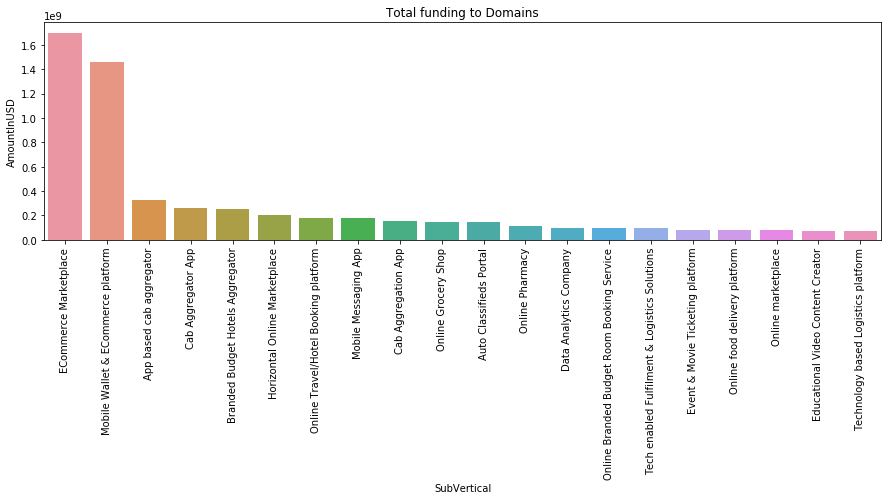

In [48]:
plt.figure(figsize=(15,4))
sns.barplot(data=top_20,x=top_20.index, y='AmountInUSD')
plt.title('Total funding to Domains')
plt.xticks(rotation=90)

In [49]:
df_conti['SubVertical'] = fund_df['SubVertical']

### Feature : CityLocation

In [50]:
fund_df.CityLocation.isnull().sum()

179

In [51]:
fund_df.CityLocation.value_counts().head()

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Name: CityLocation, dtype: int64

As this is the known fact that most number of startup are in Bangalore then we are filling null values with Bangalore for now

In [52]:
fund_df['CityLocation'] = fund_df['CityLocation'].fillna('Bangalore')

In [53]:
fund_df.CityLocation.value_counts().head()

Bangalore    806
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Name: CityLocation, dtype: int64

In [54]:
startup_count_by_cities  =  fund_df.CityLocation.value_counts()

In [55]:
cities_df = startup_count_by_cities.to_frame(name='count')
cities_df['cities'] = startup_count_by_cities.index

In [56]:
top_20 = cities_df.head(20)

In [282]:
#import squarify
#plt.figure(figsize=(15,8))
#count = fund_df['CityLocation'].value_counts()
#squarify.plot(sizes=count.values,label=count.index, value=count.values)
#plt.title('Distribution of Startups across Top cities')

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

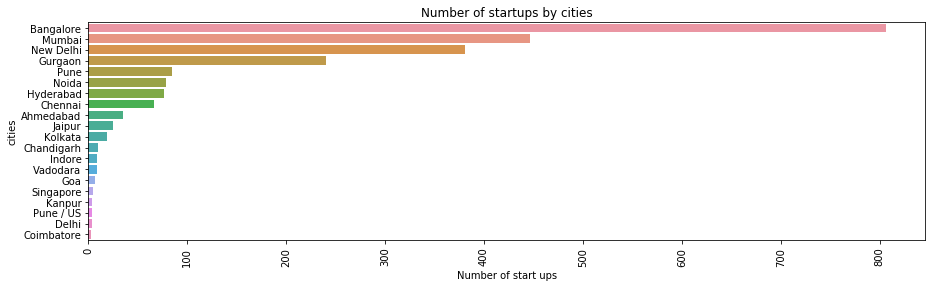

In [57]:
plt.figure(figsize=(15,4))
sns.barplot(data=top_20,x='count', y='cities')
plt.title('Number of startups by cities')
plt.xlabel('Number of start ups')
plt.xticks(rotation=90)

In [58]:
df_conti['CityLocation'] = fund_df['CityLocation']

### Feature : InvestorsName

In [59]:
fund_df.InvestorsName.isnull().sum()

8

In [60]:
fund_df.InvestorsName = fund_df.InvestorsName.str.replace('Undisclosed investors','Undisclosed Investors')

In [61]:
fund_df.InvestorsName.value_counts().head()

Undisclosed Investors       60
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Name: InvestorsName, dtype: int64

In [62]:
investor_group = vertical_sort.groupby(['IndustryVertical','InvestorsName']).sum()
investor_group.sort_values(by='AmountInUSD',ascending=False,inplace=True)
investor_relation = investor_group.index
investor_relation = investor_relation.to_frame()

In [63]:
investor_relation.head()

IndustryVertical  \
IndustryVertical                 InvestorsName                                                                
ECommerce                        SoftBank Group                                                   ECommerce   
                                 Microsoft, eBay, Tencent Holdings                                ECommerce   
Online Marketplace               Steadview Capital and existing investors                Online Marketplace   
E-Commerce & M-Commerce platform Alibaba Group, Ant Financial              E-Commerce & M-Commerce platform   
Ecommerce Marketplace            Alibaba, Foxconn, Softbank                           Ecommerce Marketplace   

                                                                                                      InvestorsName  
IndustryVertical                 InvestorsName                                                                       
ECommerce                        SoftBank Group                                                      SoftBank Group  
                                 Microsoft, eBay, Tencent Holdings                Microsoft, eBay, Tencent Holdings  
Online Marketplace               Steadview Capital and existing investors  Steadview Capital and existing investors  
E-Commerce & M-Commerce platform Alibaba Group, Ant Financial                          Alibaba Group, Ant Financial  
Ecommerce Marketplace            Alibaba, Foxconn, Softbank                              Alibaba, Foxconn, Softbank

### Feature : InvestmentType

In [64]:
fund_df.InvestmentType.isnull().sum()

1

In [65]:
fund_df['InvestmentType'] = fund_df['InvestmentType'].fillna(method='ffill')

In [66]:
fund_df['InvestmentType'].head()

0    Private Equity
1    Private Equity
2      Seed Funding
3      Seed Funding
4      Seed Funding
Name: InvestmentType, dtype: object

Text(0.5, 1.0, 'Most number to funding type')

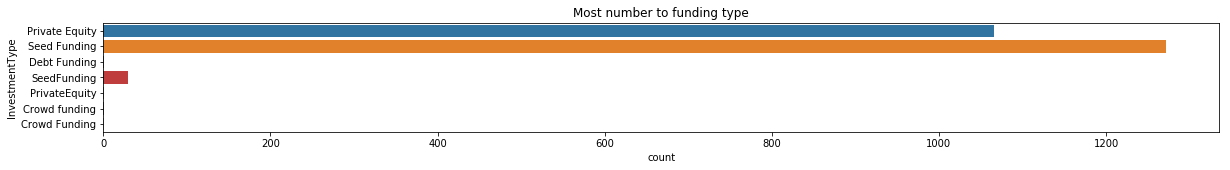

In [67]:
plt.figure(figsize=(20,2))
sns.countplot(data=fund_df,y=fund_df.InvestmentType)
plt.title('Most number to funding type')

In [68]:
df_conti['InvestmentType'] = fund_df['InvestmentType']

In [69]:
df_conti.head()

,Year,IndustryVertical,SubVertical,CityLocation,InvestmentType
0,2017,Technology,Predictive Care Platform,Bangalore,Private Equity
1,2017,Technology,Digital Marketing Agency,Mumbai,Private Equity
2,2017,Consumer Internet,Online platform for Higher Education Services,New Delhi,Seed Funding
3,2017,Consumer Internet,DIY Ecommerce platform,Mumbai,Seed Funding
4,2017,Consumer Internet,healthcare service aggregator,Hyderabad,Seed Funding


### Feature: AmountInUSD

As we already handle AmountInUSD column missing data while finding top 20 IndustryVertical. So lets explore other things in this feature

In [70]:
fund_df.AmountInUSD.isnull().sum()

0

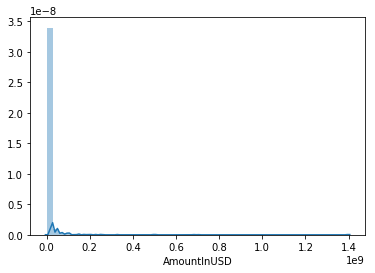

In [71]:
sns.distplot(fund_df.AmountInUSD)

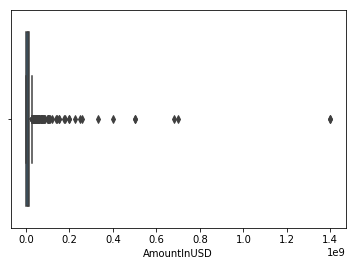

In [194]:
sns.boxplot(fund_df.AmountInUSD)

In [200]:
fund_df.AmountInUSD.shape

(2372,)

In [199]:
fund_df[fund_df.AmountInUSD>10000000].shape

(144, 9)

In [72]:
print(fund_df.AmountInUSD.mean())
print(fund_df.AmountInUSD.min())
print(fund_df.AmountInUSD.max())

12031073.099016525
16000.0
1400000000.0


In [73]:
fund_df.AmountInUSD.sort_values(ascending=False).head(5)

158     1.400000e+09
294     1.400000e+09
1976    7.000000e+08
1787    6.800000e+08
1572    5.000000e+08
Name: AmountInUSD, dtype: float64

We can see the differe in min and max has lots of difference that one reason our plot looking concentration at one area. 

In [74]:
df_conti['AmountInUSD'] = fund_df['AmountInUSD']

In [75]:
#top 20 startups by word count

In [76]:
df_conti.head()

,Year,IndustryVertical,SubVertical,CityLocation,InvestmentType,AmountInUSD
0,2017,Technology,Predictive Care Platform,Bangalore,Private Equity,1.300000e+06
1,2017,Technology,Digital Marketing Agency,Mumbai,Private Equity,1.203107e+07
2,2017,Consumer Internet,Online platform for Higher Education Services,New Delhi,Seed Funding,1.203107e+07
3,2017,Consumer Internet,DIY Ecommerce platform,Mumbai,Seed Funding,5.000000e+05
4,2017,Consumer Internet,healthcare service aggregator,Hyderabad,Seed Funding,8.500000e+05


In [77]:
df_encod = pd.DataFrame()
df_encod = df_conti

# Feature Encoding 

we will use df_encod sub dataframe for encoding and model buidling. 

Most of our independent features are categorical and we all know algorithm work best with continous data. We have deal with these categorical features. There are lots of different way to convert categorical data into numeric.Categerical feature are mostly divided into two category

Nominal (Which we can't rank like cities)

Ordinal (Which we can rant like degrees(student))

our feature are mostly lies under Nomial category and its has categorial to numeric technique call ONE HOT ENCODING. But its comes with cons call curse of dimensity becuase it will create lots of columns and that will not best fit to create the mode. 

Other alteration we can do count/fequency techniques or

just take top 10 categories and covert them into numeric and leave the rest

We are performing with top 10 categories and one hot encode

In [223]:
cat = df_encod.iloc[:,0:4]

In [229]:
cat.head()

,Year,IndustryVertical,SubVertical,CityLocation
0,2017,Technology,Predictive Care Platform,Bangalore
1,2017,Technology,Digital Marketing Agency,Mumbai
2,2017,Consumer Internet,Online platform for Higher Education Services,New Delhi
3,2017,Consumer Internet,DIY Ecommerce platform,Mumbai
4,2017,Consumer Internet,healthcare service aggregator,Hyderabad


In [225]:
from sklearn.preprocessing import LabelEncoder

In [226]:
def one_hot_encode(df,columnName):
    top10 = df[columnName].value_counts().sort_values(ascending=False).head(10).index
    for label in top10:
        df[columnName+"_"+label] = np.where(df[columnName]==label,1,0)

In [232]:
one_hot_encode(cat,'IndustryVertical')
one_hot_encode(cat,'SubVertical')
one_hot_encode(cat,'CityLocation')

In [233]:
cat.head()

,Year,IndustryVertical,SubVertical,CityLocation,IndustryVertical_Consumer Internet,IndustryVertical_Technology,IndustryVertical_ECommerce,IndustryVertical_Online Travel Marketplace,IndustryVertical_Healthcare,IndustryVertical_Logistics,...,CityLocation_Bangalore,CityLocation_Mumbai,CityLocation_New Delhi,CityLocation_Gurgaon,CityLocation_Pune,CityLocation_Noida,CityLocation_Hyderabad,CityLocation_Chennai,CityLocation_Ahmedabad,CityLocation_Jaipur
0,2017,Technology,Predictive Care Platform,Bangalore,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2017,Technology,Digital Marketing Agency,Mumbai,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2017,Consumer Internet,Online platform for Higher Education Services,New Delhi,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2017,Consumer Internet,DIY Ecommerce platform,Mumbai,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2017,Consumer Internet,healthcare service aggregator,Hyderabad,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Bulding Models

In [236]:
X = cat.iloc[:,4:]

In [237]:
X.head()

,IndustryVertical_Consumer Internet,IndustryVertical_Technology,IndustryVertical_ECommerce,IndustryVertical_Online Travel Marketplace,IndustryVertical_Healthcare,IndustryVertical_Logistics,IndustryVertical_Education,IndustryVertical_Food & Beverage,IndustryVertical_Finance,IndustryVertical_Others,...,CityLocation_Bangalore,CityLocation_Mumbai,CityLocation_New Delhi,CityLocation_Gurgaon,CityLocation_Pune,CityLocation_Noida,CityLocation_Hyderabad,CityLocation_Chennai,CityLocation_Ahmedabad,CityLocation_Jaipur
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [238]:
y = df_encod.iloc[:,-1]

In [239]:
y.head()

0    1.300000e+06
1    1.203107e+07
2    1.203107e+07
3    5.000000e+05
4    8.500000e+05
Name: AmountInUSD, dtype: float64

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

In [319]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

### Linear Regression

In [320]:
lr = LinearRegression()

In [321]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [322]:
y_pred = lr.predict(X_test)

In [324]:
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :   38002923.10177401


### K Neariest Neighbour

In [325]:
kn = KNeighborsRegressor(n_neighbors=5)

In [326]:
kn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [327]:
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [328]:
ky_pred = kn.predict(X_test)

In [329]:
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,ky_pred)))

RMSE :   38122093.10322683


### Decision Tree Regressor

In [330]:
dt = DecisionTreeRegressor()

In [331]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [332]:
dt_pred = dt.predict(X_test)

In [333]:
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,dt_pred)))

RMSE :   38181991.26251469


### Random Forest Regressor

In [334]:
rf = RandomForestRegressor(n_estimators=200)

In [335]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [336]:
rf_pred = rf.predict(X_test)

In [337]:
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,rf_pred)))

RMSE :   38204546.657068215


### XG Boost Regressor

In [338]:
xgb = xgb.XGBRFRegressor(objective ='reg:linear')

In [339]:
xgb.fit(X_train,y_train)

[17:00:11] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.8, verbosity=1)

In [340]:
xgb_pred = xgb.predict(X_test)

In [296]:
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,xgb_pred)))

RMSE :   38569482.80715971


### Cat Boost